In [1]:
import uproot
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
import timeit

plt.style.use('niceplots')

In [25]:
# read input hdf5

inputfile = '/nfs/dust/belle2/user/ferber/github-ECLML/inference-00100.hdf5'
starttime = timeit.default_timer()

h5f = h5py.File(inputfile,'r')
input_phi = h5f['input_phi'][:]
input_theta = h5f['input_theta'][:]
input_energy = h5f['input_energy'][:]
target_t0 = h5f['target_t0'][:]
target_t1 = h5f['target_t1'][:]
target_tbkg = h5f['target_tbkg'][:]
target_p0 = h5f['target_p0'][:]
target_p1 = h5f['target_p1'][:]
target_pbkg = h5f['target_pbkg'][:]
mon_E0 = h5f['mon_E0'][:]
mon_E1 = h5f['mon_E1'][:]
mon_theta0 = h5f['mon_theta0'][:]
mon_theta1 = h5f['mon_theta1'][:]
mon_phi0 = h5f['mon_phi0'][:]
mon_phi1 = h5f['mon_phi1'][:]
mon_angle = h5f['mon_angle'][:]
mon_nshared = h5f['mon_nshared'][:]
mon_n0 = h5f['mon_n0'][:]
mon_n1 = h5f['mon_n1'][:]
mon_e0_sel = h5f['mon_e0_sel'][:]
mon_e1_sel = h5f['mon_e1_sel'][:]
mon_e0_tot = h5f['mon_e0_tot'][:]
mon_e1_tot = h5f['mon_e1_tot'][:]
mon_e0_overlap = h5f['mon_e0_overlap'][:]
mon_e1_overlap = h5f['mon_e1_overlap'][:]

h5f.close()
print("The time difference is :", timeit.default_timer() - starttime)

The time difference is : 0.08782731182873249


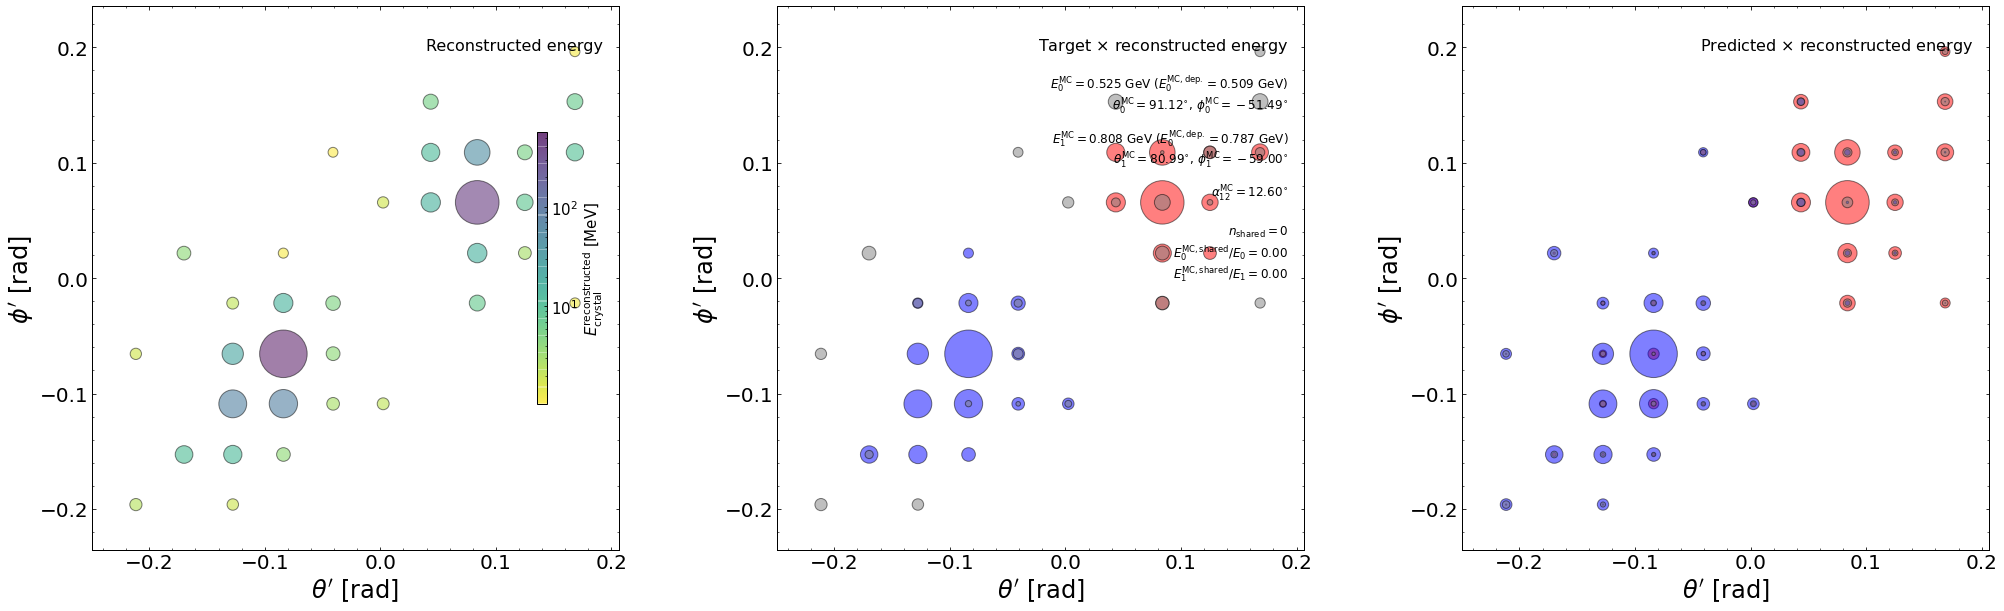

In [28]:
for idx in range(0,10):
    
    if idx !=7:
        continue
    
            
    range_theta = [np.min(input_theta[idx]), np.max(input_theta[idx])]
    range_phi = [np.min(input_phi[idx]), np.max(input_phi[idx])]
    width_theta = range_theta[1]-range_theta[0]
    width_phi = range_phi[1]-range_phi[0]
    range_theta[0] -= width_theta*0.1
    range_theta[1] += width_theta*0.1
    range_phi[0] -= width_phi*0.1
    range_phi[1] += width_phi*0.1

    # display of multiple plots (make it large!)
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    import matplotlib.patches as patches

    fig = plt.figure(figsize=(34,10))
    gs = fig.add_gridspec(1, 3)
    plt.subplots_adjust(wspace=0.3)
    markerscale = 30

    # ----
    # ECLCALDIGIT ENERGIES (INPUT)
    ax00 = fig.add_subplot(gs[0, 0])
    ax00.set_xlabel(r'$\theta^{\prime}$ [rad]')
    ax00.set_ylabel(r'$\phi^{\prime}$ [rad]')

    im = plt.scatter( input_theta[idx], 
                input_phi[idx],
                c = input_energy[idx]*1000,
                s = np.sqrt(input_energy[idx]*10000)*markerscale,
                cmap = 'viridis_r', 
                alpha =0.5,
                norm=mpl.colors.LogNorm(),
                edgecolor='black')
    _=plt.text(0.97, 0.92, 'Reconstructed energy', fontsize=16, transform=ax00.transAxes, horizontalalignment='right')
    ax00.set_xlim(range_theta)
    ax00.set_ylim(range_phi)

    cbaxes = inset_axes(ax00, width="100%", height="100%", loc='lower left',
                       bbox_to_anchor=(0.825,0.25,.02,.5), bbox_transform=ax00.transAxes) 
    cbar = plt.colorbar(cax=cbaxes, orientation='vertical')
    cbar.ax.tick_params(labelsize=15) 
    cbar.set_label(r'$E_{\rm{crystal}}^{\rm{reconstructed}}$ [MeV]', size=15)

    # ----
    # TARGET WEIGHTS
    ax01 = fig.add_subplot(gs[0, 1])
    ax01.set_xlabel(r'$\theta^{\prime}$ [rad]')
    ax01.set_ylabel(r'$\phi^{\prime}$ [rad]')

    im = plt.scatter( input_theta[idx], 
                input_phi[idx],
                c = 'r',
                s = np.sqrt(target_t0[idx]*input_energy[idx]*10000)*markerscale,
                alpha =0.5,
                norm=mpl.colors.LogNorm(),
                edgecolor='black')


    im = plt.scatter( input_theta[idx], 
                input_phi[idx],
                c = 'b',
                s = np.sqrt(target_t1[idx]*input_energy[idx]*10000)*markerscale,
                alpha =0.5,
                norm=mpl.colors.LogNorm(),
                edgecolor='black')

    im = plt.scatter( input_theta[idx], 
                input_phi[idx],
                c = 'gray',
                s = np.sqrt(target_tbkg[idx]*input_energy[idx]*10000)*markerscale,
                alpha =0.5,
                norm=mpl.colors.LogNorm(),
                edgecolor='black')

    _=plt.text(0.97, 0.92, r'Target $\times$ reconstructed energy', fontsize=16, transform=ax01.transAxes, horizontalalignment='right')
    _=ax01.set_xlim(range_theta)
    _=ax01.set_ylim(range_phi)
    
    # ----
    # PREDICTED WEIGHTS
    ax02 = fig.add_subplot(gs[0, 2])
    ax02.set_xlabel(r'$\theta^{\prime}$ [rad]')
    ax02.set_ylabel(r'$\phi^{\prime}$ [rad]')

    im = plt.scatter( input_theta[idx], 
                input_phi[idx],
                c = 'r',
                s = np.sqrt(target_p0[idx]*input_energy[idx]*10000)*markerscale,
                alpha =0.5,
                norm=mpl.colors.LogNorm(),
                edgecolor='black')


    im = plt.scatter( input_theta[idx], 
                input_phi[idx],
                c = 'b',
                s = np.sqrt(target_p1[idx]*input_energy[idx]*10000)*markerscale,
                alpha =0.5,
                norm=mpl.colors.LogNorm(),
                edgecolor='black')

    im = plt.scatter( input_theta[idx], 
                input_phi[idx],
                c = 'gray',
                s = np.sqrt(target_pbkg[idx]*input_energy[idx]*10000)*markerscale,
                alpha =0.5,
                norm=mpl.colors.LogNorm(),
                edgecolor='black')

    _=plt.text(0.97, 0.92, r'Predicted $\times$ reconstructed energy', fontsize=16, transform=ax02.transAxes, horizontalalignment='right')
    _=ax02.set_xlim(range_theta)
    _=ax02.set_ylim(range_phi)
    
    fs = 12
    _=plt.text(0.97, 0.85, r'$E_0^{{\rm{{MC}}}}={:.3f}$ GeV ($E_0^{{\rm{{MC, dep.}}}}={:.3f}$ GeV)'.format(mon_E0[idx][0], mon_e0_sel[idx][0]), fontsize=fs, transform=ax01.transAxes, horizontalalignment='right')
    _=plt.text(0.97, 0.81, r'$\theta_0^{{\rm{{MC}}}}={:.2f} ^{{\circ}}$, $\phi_0^{{\rm{{MC}}}}={:.2f} ^{{\circ}}$'.format(np.degrees(mon_theta0[idx][0]), np.degrees(mon_phi0[idx][0])), fontsize=fs, transform=ax01.transAxes, horizontalalignment='right')

    _=plt.text(0.97, 0.75, r'$E_1^{{\rm{{MC}}}}={:.3f}$ GeV ($E_0^{{\rm{{MC, dep.}}}}={:.3f}$ GeV)'.format(mon_E1[idx][0], mon_e1_sel[idx][0]), fontsize=fs, transform=ax01.transAxes, horizontalalignment='right')
    _=plt.text(0.97, 0.71, r'$\theta_1^{{\rm{{MC}}}}={:.2f} ^{{\circ}}$, $\phi_1^{{\rm{{MC}}}}={:.2f} ^{{\circ}}$'.format(np.degrees(mon_theta1[idx][0]), np.degrees(mon_phi1[idx][0])), fontsize=fs, transform=ax01.transAxes, horizontalalignment='right')

    _=plt.text(0.97, 0.65, r'$\alpha_{{12}}^{{\rm{{MC}}}}={:.2f} ^{{\circ}}$'.format(np.degrees(mon_angle[idx][0])), fontsize=fs, transform=ax01.transAxes, horizontalalignment='right')

    _=plt.text(0.97, 0.58, r'$n_{{\rm{{shared}}}}={}$'.format(int(mon_nshared[idx][0])), fontsize=fs, transform=ax01.transAxes, horizontalalignment='right')
    _=plt.text(0.97, 0.54, r'$E_0^{{\rm{{MC, shared}}}}/E_0={:.2f}$'.format(mon_e0_overlap[idx][0]/mon_e0_sel[idx][0]), fontsize=fs, transform=ax01.transAxes, horizontalalignment='right')
    _=plt.text(0.97, 0.50, r'$E_1^{{\rm{{MC, shared}}}}/E_1={:.2f}$'.format(mon_e1_overlap[idx][0]/mon_e1_sel[idx][0]), fontsize=fs, transform=ax01.transAxes, horizontalalignment='right')

    plt.savefig(f'plot_prepare_{idx}.pdf', bbox_inches='tight')
#     plt.close()